In [43]:
import pandas as pd

df = pd.read_csv("./data/citrus.csv")
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [45]:
from sklearn import preprocessing

# df.loc[df["name"] == "grapefruit", "name"] = 0
# df.loc[df["name"] == "orange", "name"] = 1

label_encoder = preprocessing.LabelEncoder()
df['name'] = label_encoder.fit_transform(df['name'])

print(df)

      name  diameter  weight  red  green  blue
0        1      2.96   86.76  172     85     2
1        1      3.91   88.05  166     78     3
2        1      4.42   95.17  156     81     2
3        1      4.47   95.60  163     81     4
4        1      4.48   95.76  161     72     9
...    ...       ...     ...  ...    ...   ...
9995     0     15.35  253.89  149     77    20
9996     0     15.41  254.67  148     68     7
9997     0     15.59  256.50  168     82    20
9998     0     15.92  260.14  142     72    11
9999     0     16.45  261.51  152     74     2

[10000 rows x 6 columns]


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  int64  
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 468.9 KB


In [47]:
dataset = df.values
print(dataset)

[[  1.     2.96  86.76 172.    85.     2.  ]
 [  1.     3.91  88.05 166.    78.     3.  ]
 [  1.     4.42  95.17 156.    81.     2.  ]
 ...
 [  0.    15.59 256.5  168.    82.    20.  ]
 [  0.    15.92 260.14 142.    72.    11.  ]
 [  0.    16.45 261.51 152.    74.     2.  ]]


In [48]:
X = dataset[:,1:6]
y = dataset[:,0]
print(X)
print(y)

[[  2.96  86.76 172.    85.     2.  ]
 [  3.91  88.05 166.    78.     3.  ]
 [  4.42  95.17 156.    81.     2.  ]
 ...
 [ 15.59 256.5  168.    82.    20.  ]
 [ 15.92 260.14 142.    72.    11.  ]
 [ 16.45 261.51 152.    74.     2.  ]]
[1. 1. 1. ... 0. 0. 0.]


   diameter  weight    red  green  blue
0      2.96   86.76  172.0   85.0   2.0
1      3.91   88.05  166.0   78.0   3.0
2      4.42   95.17  156.0   81.0   2.0
3      4.47   95.60  163.0   81.0   4.0
4      4.48   95.76  161.0   72.0   9.0
   diameter    weight       red     green      blue
0  0.000000  0.000000  0.740260  0.635294  0.000000
1  0.070423  0.007382  0.662338  0.552941  0.018519
2  0.108228  0.048126  0.532468  0.588235  0.000000
3  0.111935  0.050587  0.623377  0.588235  0.037037
4  0.112676  0.051502  0.597403  0.482353  0.129630


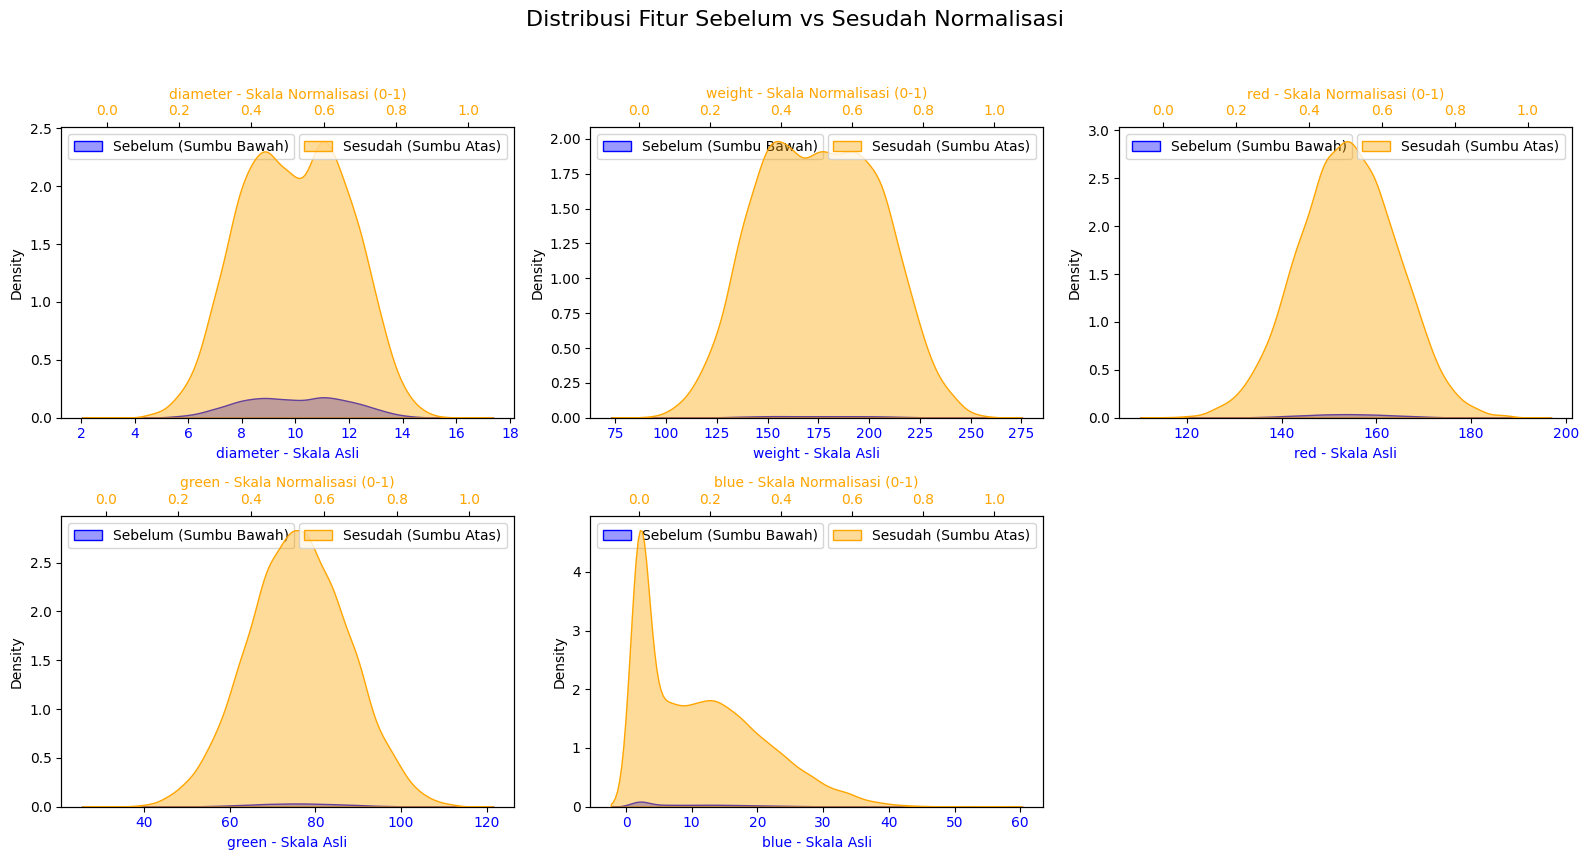

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

feature_columns = df.columns[1:6]

X_before_df = pd.DataFrame(X, columns=feature_columns)
print(X_before_df.head())

X_after_df = pd.DataFrame(X_scale, columns=feature_columns)
print(X_after_df.head())

fig, axes = plt.subplots(2, 3, figsize=(16, 9))
fig.suptitle('Distribusi Fitur Sebelum vs Sesudah Normalisasi', fontsize=16)
axes = axes.flatten()

for i, col in enumerate(feature_columns):
    sns.kdeplot(X_before_df[col], ax=axes[i], label="Sebelum (Sumbu Bawah)", color='blue', fill=True, alpha=0.4)
    axes[i].legend(loc='upper left')
    axes[i].set_xlabel(f'{col} - Skala Asli', color='blue')
    axes[i].tick_params(axis='x', labelcolor='blue')

    ax2 = axes[i].twiny()

    sns.kdeplot(X_after_df[col], ax=ax2, label="Sesudah (Sumbu Atas)", color='orange', fill=True, alpha=0.4)
    ax2.legend(loc='upper right')
    ax2.set_xlabel(f'{col} - Skala Normalisasi (0-1)', color='orange')
    ax2.tick_params(axis='x', labelcolor='orange')

for i in range(len(feature_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

In [51]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(5,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

c:\Users\Lucky\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=['accuracy'])

In [53]:
model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5651 - loss: 0.6614
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7971 - loss: 0.6116
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8794 - loss: 0.5513
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9047 - loss: 0.4721
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9227 - loss: 0.3819
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9239 - loss: 0.3122
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9263 - loss: 0.2643
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9259 - loss: 0.2335
Epoch 9/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9276 - loss: 0.2142
Epoch 10/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9276 - loss: 0.2019
Epoch 11/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9276 - loss: 0.1941
Epoch 12/100
219/219 ━━━━━━━━━━━━━━━━━━━━

In [54]:
model.evaluate(X_test, Y_test, batch_size=1)

3000/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9230 - loss: 0.1821


[0.1821356564760208, 0.9229999780654907]